<p>Dataset to Download</p>
<ul>
    <li><a class="active btn" href="https://drive.google.com/drive/folders/1sORYSmdv9xzZlev5_m_Jqy25H3MEFWqd?usp=sharing">Test Data</a></li>
    <li><a class="active btn" href="https://drive.google.com/drive/folders/1wziCVu7-U2wQoE1fQHKEGbngYHOvi57o?usp=sharing">Train Data</a></li>
   </ul>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
!pip install tensorflow==2.0.0

  Using cached https://files.pythonhosted.org/packages/54/5f/e1b2d83b808f978f51b7ce109315154da3a3d4151aa59686002681f2e109/tensorflow-2.0.0-cp37-cp37m-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/bc/19/404708a7e54ad2798907210462fd950c3442ea51acc8790f3da48d2bee8b/opt_einsum-3.3.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/4e/35/11749bf99b2d4e3cceb4d55ca22590b0d7c2c62b9de38ac4a4a7f4687421/gast-0.2.2.tar.gz
  Using cached https://files.pythonhosted.org/packages/a3/de/c648ef6835192e6e2cc03f40b19eeda4382c49b5bafb43d88b931c4c74ac/google_pasta-0.2.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/b3/41/5e2dfb15fdae38be5dd62be30f9fd40c57e50bd56ee2c276f6230c57a3ad/protobuf-3.19.4-cp37-cp37m-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/76/54/99b9d5d52d5cb732f099baaaf7740403e83fe6b0cedde940fabd2b13d75a/tensorboard-2.0.2-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/8a/48/a

In [3]:
!pip install h5py==2.10.0 --force-reinstall

  Using cached h5py-2.10.0-cp37-cp37m-manylinux1_x86_64.whl (2.9 MB)
  Using cached six-1.16.0-py2.py3-none-any.whl (11 kB)
  Using cached numpy-1.21.5-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (15.7 MB)
  Attempting uninstall: six
    Found existing installation: six 1.16.0
    Uninstalling six-1.16.0:
      Successfully uninstalled six-1.16.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
  Attempting uninstall: h5py
    Found existing installation: h5py 2.10.0
    Uninstalling h5py-2.10.0:
      Successfully uninstalled h5py-2.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-probability 0.16.0 requires gast>=0.3.2, but you have gast 0.2.2 which is incompatible.
google-colab 1.0.0 requires six~=1.15.0, but you have six 1.16.0 

In [4]:
import tensorflow
tensorflow.__version__

'2.0.0'

In [5]:
from tensorflow.keras.layers import Dense, Flatten, Input, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [6]:
#SEARCHING FOR P100
import os
import time
x=!nvidia-smi
count=0
for i in x:
    if "============" in i:
        count+=1
        break
    count+=1
if 'p100' in x[count].lower():
    print("found")
else:
    print(x[count])
    time.sleep(1)
    #os._exit(00)

|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |


In [7]:
import tensorflow
from tensorflow.python.client import device_lib 
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 8627958762054767862
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 16430504720574475953
physical_device_desc: "device: XLA_CPU device"
]


In [8]:
# Resizinig all the images to (224,224)
IMAGE_SIZE = [224,224]

train_path = '/content/drive/MyDrive/retina/test'
test_path = '/content/drive/MyDrive/retina/train'

In [9]:
# Scaling all the images between 0 to 1

train_datagen = ImageDataGenerator(rescale = 1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=False)

# Performing only scaling on the test dataset

test_datagen = ImageDataGenerator(rescale=1./255)

In [10]:
train_set = train_datagen.flow_from_directory(train_path,
                                              target_size=(224,224),
                                              batch_size=32,
                                              class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(test_path,
                                            target_size=(224,224),
                                            batch_size=32,
                                            class_mode='categorical')

Found 539 images belonging to 2 classes.
Found 1389 images belonging to 2 classes.


# **ResNet50**

In [11]:
resnet = ResNet50(input_shape = IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [12]:
for layer in resnet.layers:
  layer.trainable = False

In [13]:
x = Flatten()(resnet.output)

In [14]:
prediction = Dense(2, activation='softmax')(x)

In [15]:
model = Model(inputs = resnet.inputs, outputs = prediction)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [16]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
hist = model.fit_generator(train_set, validation_data=test_set, epochs=20, steps_per_epoch=1, validation_steps=1,callbacks=[callback])

Epoch 1/20
1/1 [==============================] - 67s 67s/step - loss: 1.2742 - accuracy: 0.5312 - val_loss: 9.5701 - val_accuracy: 0.4062
Epoch 2/20
1/1 [==============================] - 41s 41s/step - loss: 4.5332 - accuracy: 0.7188 - val_loss: 9.5701 - val_accuracy: 0.4062
Epoch 3/20
1/1 [==============================] - 41s 41s/step - loss: 6.0443 - accuracy: 0.6250 - val_loss: 9.5701 - val_accuracy: 0.4062
Epoch 4/20
1/1 [==============================] - 42s 42s/step - loss: 6.5480 - accuracy: 0.5938 - val_loss: 9.5701 - val_accuracy: 0.4062


In [18]:
model.save('/content/drive/MyDrive/retina/model1.h5')

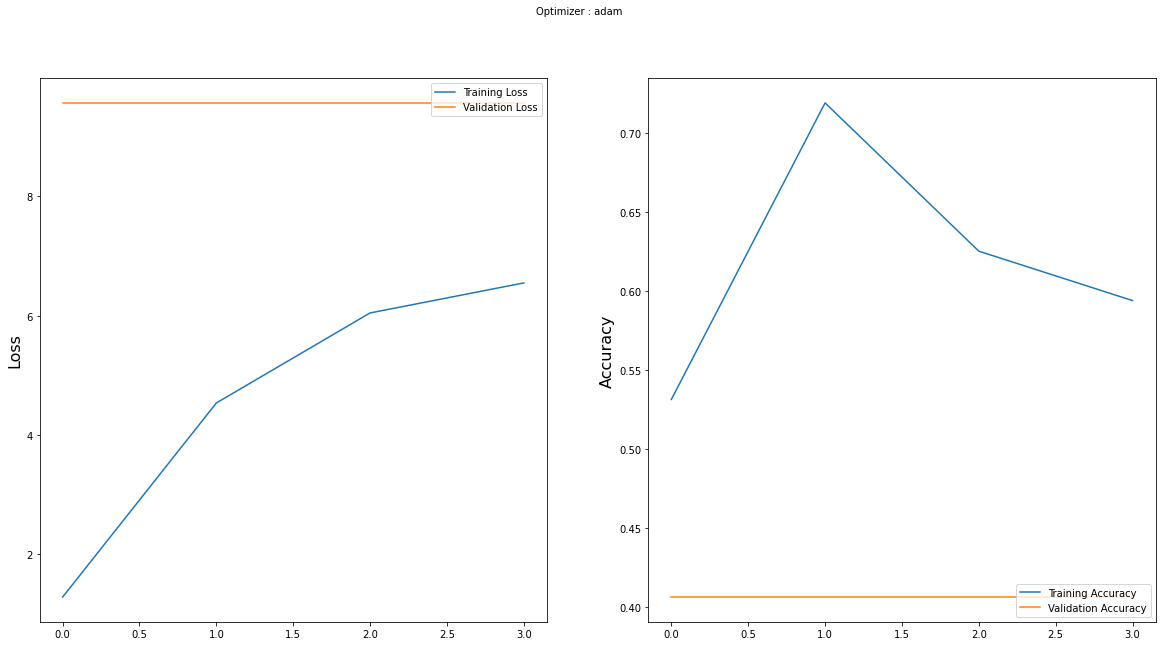

In [19]:
import matplotlib.pyplot as plt

x=hist
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# **For InceptionV3 with optimiser adam**

In [20]:
# create the base pre-trained model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
base_model = InceptionV3(weights='imagenet', include_top=False)

# add a global spatial average pooling layer
x2 = base_model.output
x2 = GlobalAveragePooling2D()(x2)

In [21]:
predictions = Dense(2, activation='softmax')(x2)

# this is the model we will train
models = Model(inputs=base_model.input, outputs=predictions)
models.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, None, None, 3 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, None, None, 3 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, None, None, 3 0           batch_normalization[0][0]        
____________________________________________________________________________________________

In [22]:
for layer in base_model.layers:
    layer.trainable = False


In [23]:
models.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
hist = models.fit_generator(train_set, validation_data=test_set, epochs=20, steps_per_epoch=len(train_set), validation_steps=len(test_set),callbacks=[callback])

Epoch 1/20
17/17 [==============================] - 727s 43s/step - loss: 0.7328 - accuracy: 0.5974 - val_loss: 0.8585 - val_accuracy: 0.5076
Epoch 2/20
17/17 [==============================] - 612s 36s/step - loss: 0.6558 - accuracy: 0.6716 - val_loss: 0.9490 - val_accuracy: 0.5047
Epoch 3/20
17/17 [==============================] - 611s 36s/step - loss: 0.6324 - accuracy: 0.6883 - val_loss: 0.8222 - val_accuracy: 0.4989
Epoch 4/20
17/17 [==============================] - 609s 36s/step - loss: 0.6183 - accuracy: 0.6846 - val_loss: 1.0246 - val_accuracy: 0.5112
Epoch 5/20
17/17 [==============================] - 604s 36s/step - loss: 0.6204 - accuracy: 0.6772 - val_loss: 0.9774 - val_accuracy: 0.5126
Epoch 6/20
17/17 [==============================] - 607s 36s/step - loss: 0.6274 - accuracy: 0.6790 - val_loss: 1.2112 - val_accuracy: 0.5068
Epoch 7/20
17/17 [==============================] - 608s 36s/step - loss: 0.6081 - accuracy: 0.7013 - val_loss: 1.1146 - val_accuracy: 0.5061
Epoch 

In [24]:
models.save('model2.h5')

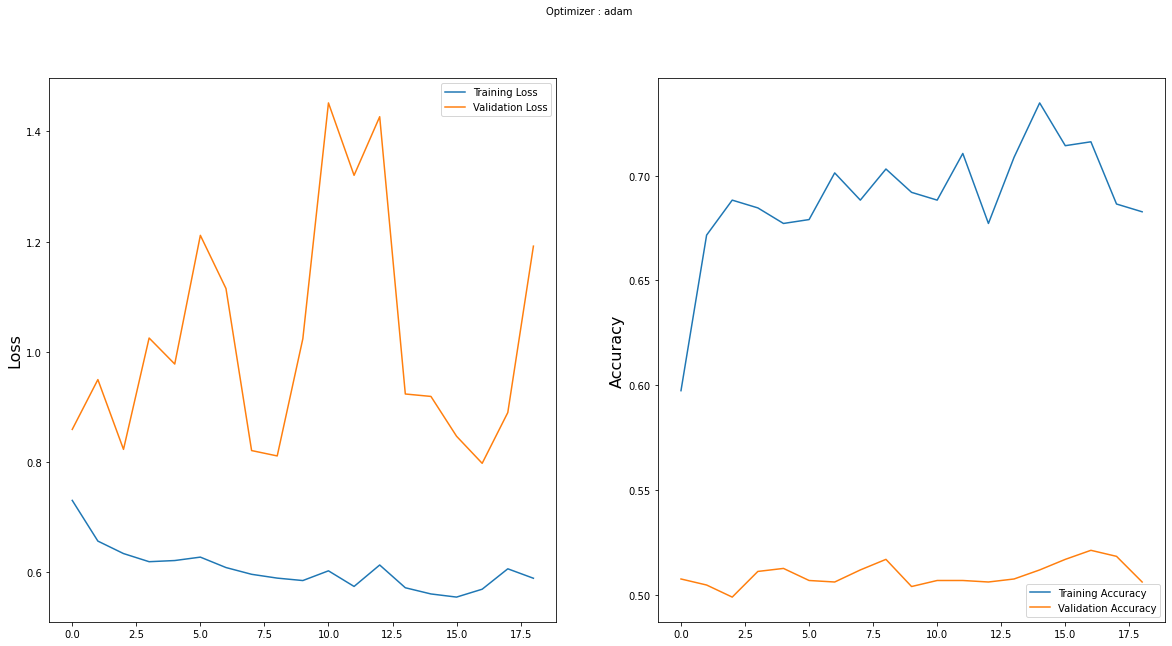

In [25]:
import matplotlib.pyplot as plt

x=hist
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()


# **INCEPTION RESNET V2**

In [26]:
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input
from tensorflow.keras.models import Model
inc=InceptionResNetV2(input_shape = IMAGE_SIZE + [3], weights='imagenet', include_top=False)

219062272/219055592 [==============================] - 3s 0us/step


In [27]:
x3 = Flatten()(inc.output)
predictionss = Dense(2, activation='softmax')(x3)

In [28]:
modelss = Model(inputs = inc.inputs, outputs = predictionss)
modelss.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_94 (Conv2D)              (None, 111, 111, 32) 864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 111, 111, 32) 96          conv2d_94[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 111, 111, 32) 0           batch_normalization_94[0][0]     
____________________________________________________________________________________________

In [ ]:
modelss.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
r2 = modelss.fit_generator(train_set, validation_data=test_set, epochs=20, steps_per_epoch=len(train_set), validation_steps=len(test_set))
x=r2

Epoch 1/20
17/17 [==============================] - 1280s 75s/step - loss: 2.0095 - accuracy: 0.6660 - val_loss: 7.9419 - val_accuracy: 0.5068
Epoch 2/20
17/17 [==============================] - 1242s 73s/step - loss: 0.7959 - accuracy: 0.6939 - val_loss: 7.1084 - val_accuracy: 0.5068
Epoch 3/20
17/17 [==============================] - 1236s 73s/step - loss: 0.8174 - accuracy: 0.6920 - val_loss: 1.2724 - val_accuracy: 0.5068
Epoch 4/20
17/17 [==============================] - 1244s 73s/step - loss: 0.8575 - accuracy: 0.6939 - val_loss: 1.3004 - val_accuracy: 0.5076
Epoch 5/20
17/17 [==============================] - 1219s 72s/step - loss: 0.8119 - accuracy: 0.6939 - val_loss: 1.6384 - val_accuracy: 0.5068
Epoch 6/20
17/17 [==============================] - 1234s 73s/step - loss: 0.7408 - accuracy: 0.6939 - val_loss: 1.9277 - val_accuracy: 0.5068
Epoch 7/20
17/17 [==============================] - 1252s 74s/step - loss: 0.7129 - accuracy: 0.6883 - val_loss: 7.3754 - val_accuracy: 0.5068

In [ ]:
modelss.save('/content/drive/MyDrive/retina/model3.h5')

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# **MobileNet**

In [ ]:
from tensorflow.keras.applications import MobileNet, MobileNetV2
mob = MobileNet(input_shape = IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [ ]:
x1= Flatten()(mob.output)
prediction1 = Dense(2, activation='softmax')(x1)
model12 = Model(inputs = mob.inputs, outputs = prediction1)
model12.summary()
model12.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
r1 = model12.fit_generator(train_set, validation_data=test_set, epochs=20, steps_per_epoch=len(train_set), validation_steps=len(test_set))

In [ ]:
model12.save('/content/drive/MyDrive/retina/model4.h5')

In [ ]:
import matplotlib.pyplot as plt

x=r1
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# **DenseNet121**

In [ ]:
from tensorflow.keras.applications import DenseNet121, DenseNet169, DenseNet201, ResNet50V2,ResNet101V2,ResNet152V2

In [ ]:
des121=DenseNet121(input_shape = IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [ ]:
x1= Flatten()(des121.output)
prediction1 = Dense(2, activation='softmax')(x1)
model1 = Model(inputs = des121.inputs, outputs = prediction1)
model1.summary()
model1.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
r1 = model1.fit_generator(train_set, validation_data=test_set, epochs=20, steps_per_epoch=len(train_set), validation_steps=len(test_set))

In [ ]:
import matplotlib.pyplot as plt

x=r1
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# **DenseNet169**

In [ ]:
des169=DenseNet169(input_shape = IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [ ]:
x1= Flatten()(des169.output)
prediction1 = Dense(2, activation='softmax')(x1)
model1 = Model(inputs = des169.inputs, outputs = prediction1)
model1.summary()
model1.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
r1 = model1.fit_generator(train_set, validation_data=test_set, epochs=20, steps_per_epoch=len(train_set), validation_steps=len(test_set))

In [ ]:
model1.save('/content/drive/MyDrive/retina/model6.h5')

In [ ]:
import matplotlib.pyplot as plt

x=r1
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()